In [2]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('../assets/data/RFMScore.csv')
df.head()

,index,TransactionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,...,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label,User_Label
0,0,TransactionId_76871,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,0,1,0,90,119,109921.75,1,Bad
1,1,TransactionId_73770,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,1,0,0,90,119,109921.75,1,Bad
2,2,TransactionId_26203,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,-0.444993,...,0,0,0,1,0,90,2,1000.00,1,Bad
3,3,TransactionId_380,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,-0.404020,...,1,0,0,1,0,90,38,228727.20,1,Bad
4,4,TransactionId_28195,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,-0.404020,...,0,0,1,0,0,90,38,228727.20,1,Bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               95662 non-null  int64  
 1   TransactionId                       95662 non-null  object 
 2   CustomerId                          95662 non-null  object 
 3   Amount                              95662 non-null  float64
 4   TransactionStartTime                95662 non-null  object 
 5   PricingStrategy                     95662 non-null  int64  
 6   FraudResult                         95662 non-null  int64  
 7   TotalTransactionAmount              95662 non-null  float64
 8   AverageTransactionAmount            95662 non-null  float64
 9   TotalTransactions                   95662 non-null  float64
 10  StdTransactionAmount                95662 non-null  float64
 11  TransactionHour                     95662

In [5]:
%pip install Jinja2
df.stb.freq(['User_Label'], style=True)

  Using cached jinja2-3.1.5-py3-none-any.whl (134 kB)
  Using cached MarkupSafe-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


,User_Label,count,percent,cumulative_count,cumulative_percent
0,Bad,"78,570",82.13%,"78,570",82.13%
1,Good,"17,092",17.87%,"95,662",100.00%


In [6]:
# FraudResult - check categories
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [7]:
# PricingStrategy - check categories
df.stb.freq(['PricingStrategy'], style = True)

,PricingStrategy,count,percent,cumulative_count,cumulative_percent
0,2,"79,848",83.47%,"79,848",83.47%
1,4,"13,562",14.18%,"93,410",97.65%
2,1,"1,867",1.95%,"95,277",99.60%
3,0,385,0.40%,"95,662",100.00%


In [8]:
# Check numeric variables
df.describe()

,index,Amount,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,StdTransactionAmount,TransactionHour,TransactionDay,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label
count,95662.000000,9.566200e+04,95662.000000,95662.000000,9.566200e+04,9.566200e+04,9.566200e+04,9.566200e+04,95662.000000,95662.000000,...,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,95662.000000
mean,47830.500000,6.717846e+03,2.255974,0.002018,-3.599090e+06,6.717846e+03,-1.663791e-16,8.081270e-17,12.447722,15.902898,...,0.013370,0.020071,0.005624,0.388252,0.595168,0.010955,41.801175,392.982982,-3.599090e+06,0.821329
std,27615.385063,1.233068e+05,0.732924,0.044872,2.180271e+07,8.568352e+04,1.000005e+00,1.000005e+00,4.846964,8.962822,...,0.114854,0.140243,0.074782,0.487355,0.490862,0.104093,25.588896,878.631072,2.180271e+07,0.383078
min,0.000000,-1.000000e+06,0.000000,0.000000,-1.049000e+08,-4.250000e+05,-4.461315e-01,-2.017187e-01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.049000e+08,0.000000
25%,23915.250000,-5.000000e+01,2.000000,0.000000,6.000000e+04,1.260812e+03,-4.108492e-01,-1.656619e-01,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,32.000000,6.000000e+04,1.000000
50%,47830.500000,1.000000e+03,2.000000,0.000000,2.015113e+05,2.272951e+03,-3.414227e-01,-1.354443e-01,13.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,43.000000,93.000000,2.015113e+05,1.000000
75%,71745.750000,2.800000e+03,2.000000,0.000000,7.089360e+05,4.080464e+03,-1.365574e-01,-8.555847e-02,17.000000,24.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,63.000000,273.000000,7.089360e+05,1.000000
max,95661.000000,9.880000e+06,4.000000,1.000000,8.345124e+07,8.601821e+06,4.208861e+00,3.700155e+01,23.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,4091.000000,8.345124e+07,1.000000


In [9]:
# missing check
df.stb.missing()

,missing,total,percent
index,0,95662,0.0
TransactionId,0,95662,0.0
CustomerId,0,95662,0.0
Amount,0,95662,0.0
TransactionStartTime,0,95662,0.0
PricingStrategy,0,95662,0.0
FraudResult,0,95662,0.0
TotalTransactionAmount,0,95662,0.0
AverageTransactionAmount,0,95662,0.0
TotalTransactions,0,95662,0.0


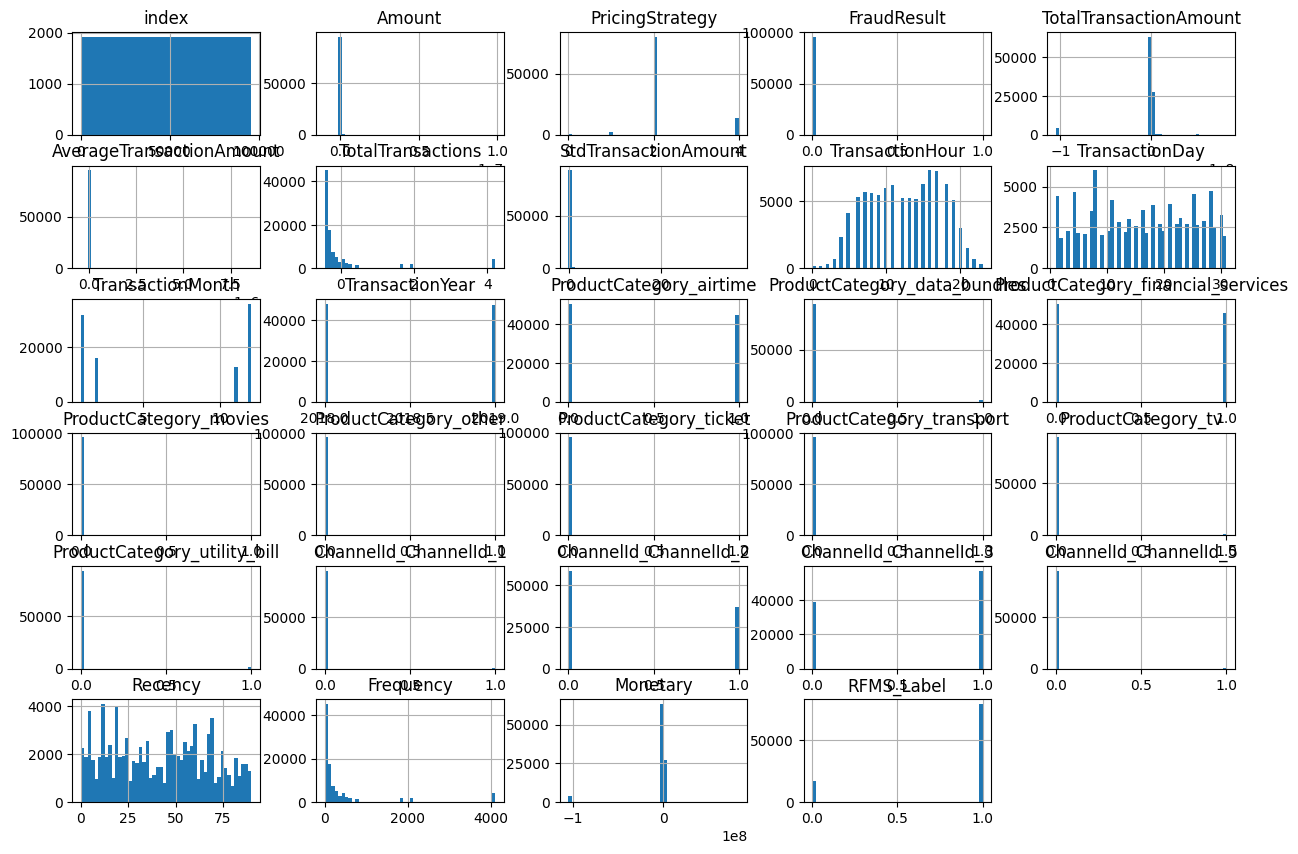

In [10]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [12]:
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [14]:
df = pd.read_csv('../assets/data/RFMScore.csv')

In [15]:
# Create a new column 'bad' based on 'User_Label'
df['Bad'] = df['User_Label'].apply(lambda x: 1 if x == 'Bad' else 0)

In [16]:
df.drop(['User_Label'], axis = 1, inplace = True)

In [17]:
# Display the first few rows to verify the new column
df.head()

,index,TransactionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label,Bad
0,0,TransactionId_76871,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,-0.311831,-0.167524,2,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,1,0,90,119,109921.75,1,1
1,1,TransactionId_73770,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,-0.311831,-0.167524,2,15,11,2018,0,0,1,0,0,0,0,0,0,0,1,0,0,90,119,109921.75,1,1
2,2,TransactionId_26203,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,-0.444993,-0.201719,2,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,1,0,90,2,1000.00,1,1
3,3,TransactionId_380,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,-0.404020,-0.008737,3,15,11,2018,0,0,0,0,0,0,0,0,1,0,0,1,0,90,38,228727.20,1,1
4,4,TransactionId_28195,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,-0.404020,-0.008737,3,15,11,2018,0,0,1,0,0,0,0,0,0,0,1,0,0,90,38,228727.20,1,1


In [18]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'Bad', ratio = 0.7, seed = 999).values()

In [19]:
df.columns

Index(['index', 'TransactionId', 'CustomerId', 'Amount', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TotalTransactionAmount', 'AverageTransactionAmount', 'TotalTransactions', 'StdTransactionAmount', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_airtime',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',
       'ChannelId_ChannelId_5', 'Recency', 'Frequency', 'Monetary', 'RFMS_Label', 'Bad'],
      dtype='object')

In [20]:
var = train.drop(['Bad', 'Amount', 'PricingStrategy'], axis = 1).columns
y_var = train['Bad']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

In [ ]:
woe_num(var, 'Bad')

In [22]:
# Check categorical variables names
bins = sc.woebin(train, y = 'Bad', x = ['Amount', 'PricingStrategy'], save_breaks_list = 'cat_breaks')

[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20250129_110546.py


In [23]:
# import dictionary
from cat_breaks_20241003_105721 import breaks_list
breaks_list

# merge
breaks.update(breaks_list)
print(breaks)

ModuleNotFoundError: No module named 'cat_breaks_20241003_105721'